# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer,tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **Load dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/GenieTalk/Ticket_classification/latest_ticket_data.csv')
df.head()

,Description,Category
0,hi since recruiter lead permission approve req...,CatetgoryD
1,re expire days hi ask help update passwords co...,CatetgoryD
2,verification warning hi has got attached pleas...,CatetgoryD
3,please dear looks blacklisted receiving mails ...,CatetgoryD
4,dear modules report report cost thank much reg...,CatetgoryD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3000 non-null   object
 1   Category     3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [ ]:
df['Category'].value_counts()

CategoryC     600
CategoryB     600
CategoryE     600
CategoryA     600
CatetgoryD    600
Name: Category, dtype: int64

In [ ]:
df.isnull().sum()

Description    0
Category       0
dtype: int64

In [ ]:
data=df.copy()

In [ ]:
data['target'] = data.Category.astype('category').cat.codes

In [ ]:
data.head()

,Description,Category,target
0,hi since recruiter lead permission approve req...,CatetgoryD,4
1,re expire days hi ask help update passwords co...,CatetgoryD,4
2,verification warning hi has got attached pleas...,CatetgoryD,4
3,please dear looks blacklisted receiving mails ...,CatetgoryD,4
4,dear modules report report cost thank much reg...,CatetgoryD,4


In [ ]:
data.drop('Category',axis=1,inplace=True)

In [ ]:
data.head()

,Description,target
0,hi since recruiter lead permission approve req...,4
1,re expire days hi ask help update passwords co...,4
2,verification warning hi has got attached pleas...,4
3,please dear looks blacklisted receiving mails ...,4
4,dear modules report report cost thank much reg...,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3000 non-null   object
 1   target       3000 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 26.5+ KB


In [ ]:

data.head()

,Description,target
0,hi since recruiter lead permission approve req...,4
1,re expire days hi ask help update passwords co...,4
2,verification warning hi has got attached pleas...,4
3,please dear looks blacklisted receiving mails ...,4
4,dear modules report report cost thank much reg...,4


In [ ]:
df_shuffle=data.sample(frac=1)

In [ ]:
df_shuffle.head()

,Description,target
569,re has assigned hi dear please assign these ch...,4
2845,sent wednesday october disk full laptop hi lap...,3
2856,sent tuesday october problem accessing dear co...,3
2493,hi we have hosts test environments for name pe...,0
2340,sent monday december access card hi was inform...,2


In [ ]:
training_sentences=[]
for i in df_shuffle['Description']:
  training_sentences.append(i)

In [ ]:
training_sentences[:3]

['re has assigned hi dear please assign these changes also done questions please let thanks engineer',
 'sent wednesday october disk full laptop hi laptop started be unusable for due fact disk full tried delete temp files documents downloads programs but after while disk full again thank you',
 'sent tuesday october problem accessing dear colleague troubles accessing sending mails she continuously asked enter her password enters correct password then pass attached window appears again please help her with issue regards']

In [ ]:
training_size=len(training_sentences)
training_size

3000

# **Tokenizing the Sentences**

In [ ]:
tokenizer = Tokenizer( oov_token="[UNK]" )
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)

In [ ]:

len(word_index)

5104

In [ ]:
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post')

In [ ]:
print(padded.shape)
print(type(padded))

(3000, 120)
<class 'numpy.ndarray'>


In [ ]:
labels=df_shuffle['target']
labels.shape
#labels=np.array(labels)
labels[:3]

569     4
2845    3
2856    3
Name: target, dtype: int8

In [ ]:
print(word_index)

{'[UNK]': 1, 'please': 2, 'regards': 3, 'hi': 4, 'thank': 5, 'hello': 6, 'card': 7, 'sent': 8, 'you': 9, 're': 10, 'thanks': 11, 'pm': 12, 'for': 13, 'kind': 14, 'access': 15, 'dear': 16, 'best': 17, 'help': 18, 'have': 19, 'engineer': 20, 'with': 21, 'floor': 22, 'by': 23, 'friday': 24, 'si': 25, 'la': 26, 'cards': 27, 'tuesday': 28, 'can': 29, 'we': 30, 'wednesday': 31, 'details': 32, 'visitor': 33, 'thursday': 34, 'name': 35, 'lost': 36, 'log': 37, 'senior': 38, 'has': 39, 'be': 40, 'october': 41, 'ext': 42, 'information': 43, 'va': 44, 'leaver': 45, 'issue': 46, 'event': 47, 'if': 48, 'let': 49, 'could': 50, 'also': 51, 'attached': 52, 'ca': 53, 'form': 54, 'en': 55, 'number': 56, 'area': 57, 'working': 58, 'officer': 59, 'december': 60, 'november': 61, 'item': 62, 'work': 63, 'july': 64, 'order': 65, 'care': 66, 'or': 67, 'link': 68, 'monday': 69, 'assign': 70, 'analyst': 71, 'change': 72, 'down': 73, 'manager': 74, 'date': 75, 'client': 76, 'high': 77, 'receive': 78, 'problem': 7

In [ ]:
#test_portion=0.1   #10%

In [ ]:
#split=int((training_size*test_portion))
#split

In [ ]:
# X_val=padded[:split]
# X_train=padded[split:]
# y_val=labels[:split]
# y_train=labels[split:]

In [ ]:
# X_val.shape,y_val.shape

# **Loading FastText Embeddings**

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2021-04-15 06:43:05--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  32.2MB/s    in 21s     

2021-04-15 06:43:26 (31.1 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
!unzip /content/wiki-news-300d-1M.vec.zip

Archive:  /content/wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
import tqdm
import numpy as np

In [ ]:
from gensim.models import FastText
def load_fasttext():
        print('loading word embeddings...')
        embeddings_index = {}
        f = open('/content/wiki-news-300d-1M.vec',encoding='utf-8')
        for line in (f):
         values = line.strip().rsplit(' ')
         word = values[0]
         coefs = np.asarray(values[1:], dtype='float32')
         embeddings_index[word] = coefs
        f.close()
        print('found %s word vectors' % len(embeddings_index))
    
        return embeddings_index


In [ ]:
embeddings_index=load_fasttext()

loading word embeddings...
found 999995 word vectors


In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_not_in_fasttext=[]
embeddings_matrix = np.zeros((vocab_size,300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector
    else:
      vocab_not_in_fasttext.append(word)    
print(vocab_not_in_fasttext)      


['[UNK]', 'assignat', 'vesuvius', 'vatic', 'bluecoat', 'rcpt', 'storying']


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 300)          1531500   
_________________________________________________________________
dropout (Dropout)            (None, 120, 300)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 64)           96064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 1,652,721
Trainable params: 121,221
Non-trainable params: 1,531,500
________________________________________

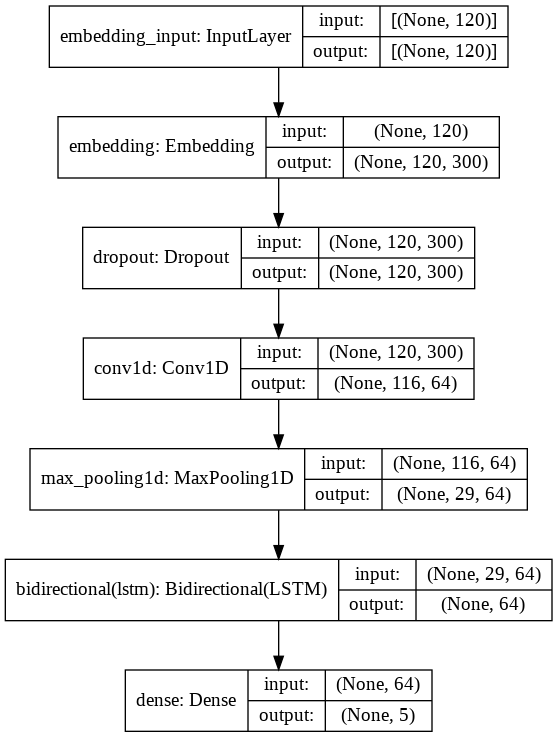

In [ ]:
model=tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=300,input_length=120,mask_zero=True,weights=[embeddings_matrix], trainable=False),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Conv1D(64,5,activation='relu'),
     tf.keras.layers.MaxPooling1D(pool_size=4),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
     tf.keras.layers.Dense(5,activation='sigmoid')
])

model.summary()
tf.keras.utils.plot_model( model,show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')] )

In [ ]:
history=model.fit(padded,labels,batch_size=32,epochs=50)

Epoch 1/50
94/94 [==============================] - 12s 80ms/step - loss: 1.2706 - accuracy: 0.4744
Epoch 2/50
94/94 [==============================] - 8s 80ms/step - loss: 0.6661 - accuracy: 0.7553
Epoch 3/50
94/94 [==============================] - 7s 79ms/step - loss: 0.5115 - accuracy: 0.8183
Epoch 4/50
94/94 [==============================] - 8s 81ms/step - loss: 0.3504 - accuracy: 0.8745
Epoch 5/50
94/94 [==============================] - 8s 81ms/step - loss: 0.2607 - accuracy: 0.9113
Epoch 6/50
94/94 [==============================] - 8s 81ms/step - loss: 0.2266 - accuracy: 0.9216
Epoch 7/50
94/94 [==============================] - 7s 79ms/step - loss: 0.1922 - accuracy: 0.9345
Epoch 8/50
94/94 [==============================] - 8s 80ms/step - loss: 0.1774 - accuracy: 0.9387
Epoch 9/50
94/94 [==============================] - 7s 79ms/step - loss: 0.1139 - accuracy: 0.9642
Epoch 10/50
94/94 [==============================] - 8s 80ms/step - loss: 0.1106 - accuracy: 0.9645
Epoch 11

In [ ]:
#model.save('fastTextmodeltfformat')

INFO:tensorflow:Assets written to: fastTextmodeltfformat/assets


INFO:tensorflow:Assets written to: fastTextmodeltfformat/assets


In [ ]:
#model.save('fastTextmodel.h5')

In [ ]:
#model.save_weights('weightsfasttexttfformat')

In [ ]:
#model.save_weights('weightsfasttext.h5')

In [ ]:
y_pred=model.predict_classes(padded)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       600
           1       0.98      1.00      0.99       600
           2       0.98      0.98      0.98       600
           3       0.99      0.98      0.99       600
           4       1.00      0.98      0.99       600

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



# **Ploting confusion matrix**

Text(44.540000000000006, 0.5, 'Predicted label')

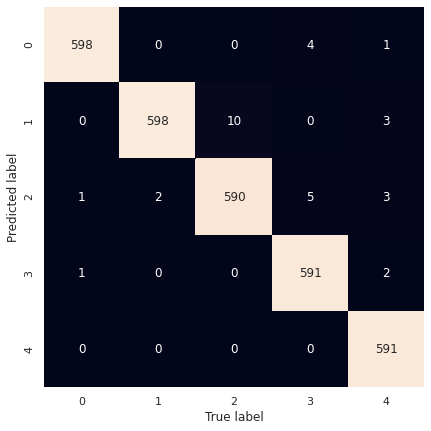

In [ ]:
mat=confusion_matrix(labels,y_pred)
plt.figure(figsize=(7,7))
sns.set()
sns.heatmap(mat.T, square=True,annot=True, fmt='d',cbar=False, 
            xticklabels=np.unique(labels),
            yticklabels=np.unique(labels))
plt.xlabel('True label')
plt.ylabel('Predicted label')

# Saving Tokenizer

In [ ]:
import json
tokenizer_json = tokenizer.to_json()
with open('tokenizerfasttext.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
with open('tokenizerfasttext.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

# **Inference with labels**

In [ ]:
dict={'0':'Application',"1": 'Database',"2": 'Network', "3":'Security', "4":'User Maintenance'}

In [ ]:
i=2500            # Enter any integer between 0  to 3000

In [ ]:
model = tf.keras.models.load_model("fastTextmodel.h5")
Description=df_shuffle['Description'][i]      # Enter Description
sequences = tokenizer.texts_to_sequences([Description])
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post')
predicted=model.predict_classes(padded)
predicted=dict[str(predicted[0])]
print('Predicted label:',predicted)
print()
y_true=df_shuffle['target'][i]
y_true=dict[str(y_true)]
print('Correct label:',y_true)
print()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted label: Application

Correct label: Application



# **Inference**

In [ ]:
i=2500                    # Enter any integer between 0  to 3000

In [ ]:
model = tf.keras.models.load_model("fastTextmodel.h5")
Description=df_shuffle['Description'][i]      # Enter Description
sequences = tokenizer.texts_to_sequences([Description])
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post')
predicted=model.predict_classes(padded)
#predicted=dict[str(predicted[0])]
print('Predicted label:',predicted[0])
print()
y_true=df_shuffle['target'][i]
#y_true=dict[str(y_true)]
print('Correct label:',y_true)
print()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted label: 0

Correct label: 0



# Making function for model

In [ ]:
def get_model():
     model=tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=300,input_length=120,mask_zero=True,weights=[embeddings_matrix], trainable=False),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Conv1D(64,5,activation='relu'),
     tf.keras.layers.MaxPooling1D(pool_size=4),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
     tf.keras.layers.Dense(5,activation='sigmoid')])
     return model

In [ ]:
Model=get_model()

# **Loading weights for models**

In [ ]:
Model.load_weights('/content/weightsfasttext.h5')

In [ ]:
dict={'0':'Application',"1": 'Database',"2": 'Network', "3":'Security', "4":'User Maintenance'}

In [ ]:
i=2500            # Enter any integer between 0  to 3000

In [ ]:
df_shuffle['Description'][269] 

'hi key date has confirmed friday february please amendments made kind regards'

In [ ]:
model = tf.keras.models.load_model("fastTextmodel.h5")
Description=input('Enter Description:')
#Description=df_shuffle['Description'][i]      # Enter Description
sequences = tokenizer.texts_to_sequences([Description])
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post')
predicted=model.predict_classes(padded)
predicted=dict[str(predicted[0])]
print('Predicted label:',predicted)
print()
y_true=df_shuffle['target'][269]
y_true=dict[str(y_true)]
print('Correct label:',y_true)
print()

Enter Description:hi key date has confirmed friday february please amendments made kind regards


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted label: User Maintenance

Correct label: User Maintenance

